In [ ]:
!pip install ultralytics opencv-python pillow pyyaml scipy

from google.colab import drive
import os

drive.mount('/content/drive')
print("Google Drive mounted successfully!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 37.6 MB/s eta 0:00:00
Mounted at /content/drive
Google Drive mounted successfully!


In [ ]:
import os

SET1_PATH = '/content/drive/MyDrive/DataMorphAI/Table extraction annotations'
SET1_IMAGES = f'{SET1_PATH}/images'
SET1_LABELS = f'{SET1_PATH}/labels'
SET1_CLASSES = f'{SET1_PATH}/classes.txt'

SET2_PATH = '/content/drive/MyDrive/DataMorphAI/TableSet2'
SET2_IMAGES = f'{SET2_PATH}/images'
SET2_LABELS = f'{SET2_PATH}/labels'
SET2_CLASSES = f'{SET2_PATH}/classes.txt'

WORK_DIR = '/content/yolov8_training_96samples'
os.makedirs(WORK_DIR, exist_ok=True)

print("=== SET 1 ===")
print(f"Images folder exists: {os.path.exists(SET1_IMAGES)}")
print(f"Labels folder exists: {os.path.exists(SET1_LABELS)}")
set1_images = sorted([f for f in os.listdir(SET1_IMAGES) if f.endswith(('.jpg', '.png', '.jpeg'))])
print(f"Total images in Set 1: {len(set1_images)}")

print("\n=== SET 2 ===")
print(f"Images folder exists: {os.path.exists(SET2_IMAGES)}")
print(f"Labels folder exists: {os.path.exists(SET2_LABELS)}")
set2_images = sorted([f for f in os.listdir(SET2_IMAGES) if f.endswith(('.jpg', '.png', '.jpeg'))])
print(f"Total images in Set 2: {len(set2_images)}")

with open(SET1_CLASSES, 'r') as f:
    classes_set1 = f.read().strip().split('\n')
with open(SET2_CLASSES, 'r') as f:
    classes_set2 = f.read().strip().split('\n')

print(f"\nSet 1 Classes: {classes_set1}")
print(f"Set 2 Classes: {classes_set2}")
print(f"Classes match: {classes_set1 == classes_set2}")

=== SET 1 ===
Images folder exists: True
Labels folder exists: True
Total images in Set 1: 60

=== SET 2 ===
Images folder exists: True
Labels folder exists: True
Total images in Set 2: 60

Set 1 Classes: ['cell', 'row', 'table']
Set 2 Classes: ['cell', 'row', 'table']
Classes match: True


In [ ]:
import shutil
import os

dataset_dir = f'{WORK_DIR}/dataset'
for split in ['train', 'val']:
    os.makedirs(f'{dataset_dir}/{split}/images', exist_ok=True)
    os.makedirs(f'{dataset_dir}/{split}/labels', exist_ok=True)

set1_train = set1_images[0:36]
set1_test  = set1_images[36:60]
set2_train = set2_images[0:60]

print(f"Set 1 train images  : {len(set1_train)}")
print(f"Set 1 test images   : {len(set1_test)}")
print(f"Set 2 train images  : {len(set2_train)}")
print(f"Total train         : {len(set1_train) + len(set2_train)}")
print(f"Total test (val)    : {len(set1_test)}")

for img_file in set1_train:
    shutil.copy(f'{SET1_IMAGES}/{img_file}', f'{dataset_dir}/train/images/{img_file}')
    label_file = img_file.rsplit('.', 1)[0] + '.txt'
    src_label = f'{SET1_LABELS}/{label_file}'
    if os.path.exists(src_label):
        shutil.copy(src_label, f'{dataset_dir}/train/labels/{label_file}')

for img_file in set2_train:
    shutil.copy(f'{SET2_IMAGES}/{img_file}', f'{dataset_dir}/train/images/{img_file}')
    label_file = img_file.rsplit('.', 1)[0] + '.txt'
    src_label = f'{SET2_LABELS}/{label_file}'
    if os.path.exists(src_label):
        shutil.copy(src_label, f'{dataset_dir}/train/labels/{label_file}')

for img_file in set1_test:
    shutil.copy(f'{SET1_IMAGES}/{img_file}', f'{dataset_dir}/val/images/{img_file}')
    label_file = img_file.rsplit('.', 1)[0] + '.txt'
    src_label = f'{SET1_LABELS}/{label_file}'
    if os.path.exists(src_label):
        shutil.copy(src_label, f'{dataset_dir}/val/labels/{label_file}')

print(f"\nTrain images copied : {len(os.listdir(f'{dataset_dir}/train/images'))}")
print(f"Train labels copied : {len(os.listdir(f'{dataset_dir}/train/labels'))}")
print(f"Val images copied   : {len(os.listdir(f'{dataset_dir}/val/images'))}")
print(f"Val labels copied   : {len(os.listdir(f'{dataset_dir}/val/labels'))}")

Set 1 train images  : 36
Set 1 test images   : 24
Set 2 train images  : 60
Total train         : 96
Total test (val)    : 24

Train images copied : 96
Train labels copied : 96
Val images copied   : 24
Val labels copied   : 24


In [ ]:
classes = classes_set1

yaml_content = f"""path: {dataset_dir}
train: train/images
val: val/images

nc: {len(classes)}
names: {classes}
"""

yaml_path = f'{dataset_dir}/data.yaml'
with open(yaml_path, 'w') as f:
    f.write(yaml_content)

print(f"YAML created at: {yaml_path}")
print(yaml_content)

YAML created at: /content/yolov8_training_96samples/dataset/data.yaml
path: /content/yolov8_training_96samples/dataset
train: train/images
val: val/images

nc: 3
names: ['cell', 'row', 'table']



In [ ]:
from ultralytics import YOLO
import os

run_dir = f'{WORK_DIR}/runs/yolov8_96samples'
os.makedirs(run_dir, exist_ok=True)

model = YOLO('yolov8n.pt')

results_train = model.train(
    data=yaml_path,
    epochs=50,
    imgsz=640,
    batch=8,
    patience=10,
    device=0,
    project=run_dir,
    name='yolov8_96samples',
    save=True,
    plots=True
)

print("Training complete")
print(f"Model saved at: {run_dir}")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.4.16 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/yolov8_training_96samples/dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v

In [ ]:
import pandas as pd

results_file = f'{run_dir}/yolov8_96samples/results.csv'
model_path = f'{run_dir}/yolov8_96samples/weights/best.pt'

results_df = pd.read_csv(results_file)

print("=" * 60)
print("YOLOv8 RESULTS: 96 samples")
print("=" * 60)
print(f"\nTotal epochs trained: {len(results_df)}")
print("\nLast 5 epochs:")
print(results_df[['epoch', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']].tail(5).to_string(index=False))

YOLOv8 RESULTS: 96 samples

Total epochs trained: 48

Last 5 epochs:
 epoch  metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  metrics/mAP50-95(B)
    44               0.82877            0.82693           0.85312              0.53656
    45               0.84492            0.82923           0.85584              0.53038
    46               0.84495            0.82392           0.85467              0.53117
    47               0.84024            0.82338           0.85630              0.53249
    48               0.83907            0.82903           0.86031              0.53815


In [ ]:
from ultralytics import YOLO

model = YOLO(model_path)

val_images_dir = f'{dataset_dir}/val/images'
val_images_list = sorted([f for f in os.listdir(val_images_dir) if f.endswith(('.jpg', '.png', '.jpeg'))])

print(f"Total test images found: {len(val_images_list)}")

val_images_to_test = [f'{val_images_dir}/{img}' for img in val_images_list]

results = model.predict(val_images_to_test, conf=0.25, save=True)

print(f"Inference complete on {len(results)} images")

Total test images found: 24

0: 640x640 50 cells, 10 rows, 2 tables, 9.4ms
1: 640x640 55 cells, 17 rows, 1 table, 9.4ms
2: 640x640 21 cells, 7 rows, 1 table, 9.4ms
3: 640x640 49 cells, 12 rows, 1 table, 9.4ms
4: 640x640 49 cells, 15 rows, 1 table, 9.4ms
5: 640x640 37 cells, 7 rows, 1 table, 9.4ms
6: 640x640 65 cells, 22 rows, 1 table, 9.4ms
7: 640x640 42 cells, 7 rows, 1 table, 9.4ms
8: 640x640 54 cells, 18 rows, 1 table, 9.4ms
9: 640x640 150 cells, 38 rows, 1 table, 9.4ms
10: 640x640 63 cells, 23 rows, 1 table, 9.4ms
11: 640x640 46 cells, 12 rows, 1 table, 9.4ms
12: 640x640 52 cells, 19 rows, 1 table, 9.4ms
13: 640x640 22 cells, 9 rows, 1 table, 9.4ms
14: 640x640 58 cells, 16 rows, 1 table, 9.4ms
15: 640x640 23 cells, 9 rows, 1 table, 9.4ms
16: 640x640 15 cells, 5 rows, 1 table, 9.4ms
17: 640x640 17 cells, 6 rows, 1 table, 9.4ms
18: 640x640 37 cells, 13 rows, 1 table, 9.4ms
19: 640x640 150 cells, 25 rows, 1 table, 9.4ms
20: 640x640 68 cells, 22 rows, 1 table, 9.4ms
21: 640x640 28 cell

In [ ]:
import numpy as np
from collections import defaultdict

print("=" * 70)
print("YOLOv8: DETAILED OBJECT DETECTION METRICS")
print("=" * 70)

all_detections = defaultdict(list)
all_confidences = []

for result in results:
    for box in result.boxes:
        cls = int(box.cls[0].cpu().numpy())
        conf = box.conf[0].cpu().numpy()
        all_detections[cls].append(conf)
        all_confidences.append(conf)

class_names_list = ['cell', 'row', 'table']

print("\n1. CLASS-WISE DETECTION SUMMARY:")
print("-" * 70)
for cls_idx, cls_name in enumerate(class_names_list):
    count = len(all_detections[cls_idx])
    avg_conf = np.mean(all_detections[cls_idx]) if count > 0 else 0
    max_conf = np.max(all_detections[cls_idx]) if count > 0 else 0
    min_conf = np.min(all_detections[cls_idx]) if count > 0 else 0
    print(f"{cls_name.upper()}")
    print(f"  Total Detections : {count}")
    print(f"  Avg Confidence   : {avg_conf:.4f}")
    print(f"  Max Confidence   : {max_conf:.4f}")
    print(f"  Min Confidence   : {min_conf:.4f}")
    print()

print("\n2. OVERALL DETECTION METRICS:")
print("-" * 70)
print(f"Total Images Tested          : {len(results)}")
print(f"Total Detections             : {len(all_confidences)}")
print(f"Average Detections per Image : {len(all_confidences)/len(results):.2f}")
print(f"Overall Average Confidence   : {np.mean(all_confidences):.4f}")
print(f"Overall Max Confidence       : {np.max(all_confidences):.4f}")
print(f"Overall Min Confidence       : {np.min(all_confidences):.4f}")
print(f"Std Dev of Confidence        : {np.std(all_confidences):.4f}")

print("\n3. STANDARD OBJECT DETECTION METRICS:")
print("-" * 70)
print(f"mAP50 (IoU=0.50)         : {results_df['metrics/mAP50(B)'].iloc[-1]:.4f}")
print(f"mAP50-95 (IoU=0.50:0.95) : {results_df['metrics/mAP50-95(B)'].iloc[-1]:.4f}")
print(f"Precision                : {results_df['metrics/precision(B)'].iloc[-1]:.4f}")
print(f"Recall                   : {results_df['metrics/recall(B)'].iloc[-1]:.4f}")

precision = results_df['metrics/precision(B)'].iloc[-1]
recall = results_df['metrics/recall(B)'].iloc[-1]
f1_score = 2 * (precision * recall) / (precision + recall + 1e-6)
print(f"F1-Score                 : {f1_score:.4f}")

print("\n4. TABLE EXTRACTION SPECIFIC METRICS:")
print("-" * 70)
table_count = len(all_detections[2])
row_count = len(all_detections[1])
cell_count = len(all_detections[0])

print(f"Tables Detected : {table_count}")
print(f"Rows Detected   : {row_count}")
print(f"Cells Detected  : {cell_count}")

if table_count > 0:
    print(f"Avg Cells per Table : {cell_count / table_count:.2f}")
    print(f"Avg Rows per Table  : {row_count / table_count:.2f}")

print("\n5. LOSS ANALYSIS:")
print("-" * 70)
print(f"Final Training Box Loss   : {results_df['train/box_loss'].iloc[-1]:.4f}")
print(f"Final Validation Box Loss : {results_df['val/box_loss'].iloc[-1]:.4f}")
print(f"Final Training Class Loss : {results_df['train/cls_loss'].iloc[-1]:.4f}")
print(f"Final Val Class Loss      : {results_df['val/cls_loss'].iloc[-1]:.4f}")

box_loss_diff = abs(results_df['train/box_loss'].iloc[-1] - results_df['val/box_loss'].iloc[-1])
print(f"\nTrain-Val Box Loss Difference : {box_loss_diff:.4f}")
if box_loss_diff < 0.5:
    print("Status: Good generalization (low overfitting)")
else:
    print("Status: Potential overfitting detected")

print("\n6. CONFIDENCE THRESHOLD ANALYSIS:")
print("-" * 70)
for threshold in [0.5, 0.6, 0.7, 0.8, 0.9]:
    high_conf = sum(1 for conf in all_confidences if conf >= threshold)
    percentage = (high_conf / len(all_confidences)) * 100 if all_confidences else 0
    print(f"Confidence >= {threshold} : {high_conf} ({percentage:.1f}%)")

print("\n" + "=" * 70)
print(f"OVERALL MODEL ACCURACY (F1-Score): {f1_score:.4f}")
print("=" * 70)

YOLOv8: DETAILED OBJECT DETECTION METRICS

1. CLASS-WISE DETECTION SUMMARY:
----------------------------------------------------------------------
CELL
  Total Detections : 1331
  Avg Confidence   : 0.5775
  Max Confidence   : 0.9347
  Min Confidence   : 0.2502

ROW
  Total Detections : 355
  Avg Confidence   : 0.5463
  Max Confidence   : 0.9353
  Min Confidence   : 0.2516

TABLE
  Total Detections : 25
  Avg Confidence   : 0.8685
  Max Confidence   : 0.9862
  Min Confidence   : 0.2645


2. OVERALL DETECTION METRICS:
----------------------------------------------------------------------
Total Images Tested          : 24
Total Detections             : 1711
Average Detections per Image : 71.29
Overall Average Confidence   : 0.5752
Overall Max Confidence       : 0.9862
Overall Min Confidence       : 0.2502
Std Dev of Confidence        : 0.1678

3. STANDARD OBJECT DETECTION METRICS:
----------------------------------------------------------------------
mAP50 (IoU=0.50)         : 0.8603
mAP

In [ ]:
import cv2
import numpy as np
import pandas as pd

def calculate_iou(box1, box2):
    x1_min, y1_min, x1_max, y1_max = box1
    x2_min, y2_min, x2_max, y2_max = box2
    inter_xmin = max(x1_min, x2_min)
    inter_ymin = max(y1_min, y2_min)
    inter_xmax = min(x1_max, x2_max)
    inter_ymax = min(y1_max, y2_max)
    if inter_xmax < inter_xmin or inter_ymax < inter_ymin:
        return 0.0
    inter_area = (inter_xmax - inter_xmin) * (inter_ymax - inter_ymin)
    box1_area = (x1_max - x1_min) * (y1_max - y1_min)
    box2_area = (x2_max - x2_min) * (y2_max - y2_min)
    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area > 0 else 0

total_gt_boxes = 0
total_pred_boxes = 0
total_tp = 0
total_fp = 0
total_fn = 0
all_ious = []
per_image_metrics = []

print("=" * 80)
print("YOLOv8: QUANTITATIVE COMPARISON: GROUND TRUTH vs PREDICTIONS")
print("=" * 80)

for idx, img_file in enumerate(val_images_list):
    img_path = f'{dataset_dir}/val/images/{img_file}'
    label_file = img_file.rsplit('.', 1)[0] + '.txt'
    label_path = f'{dataset_dir}/val/labels/{label_file}'
    img = cv2.imread(img_path)
    h, w = img.shape[:2]

    gt_boxes = []
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            lines = f.readlines()
        for line in lines:
            parts = line.strip().split()
            cls = int(parts[0])
            x_center = float(parts[1]) * w
            y_center = float(parts[2]) * h
            box_w = float(parts[3]) * w
            box_h = float(parts[4]) * h
            x1 = x_center - box_w / 2
            y1 = y_center - box_h / 2
            x2 = x_center + box_w / 2
            y2 = y_center + box_h / 2
            gt_boxes.append((x1, y1, x2, y2, cls))

    pred_boxes = []
    result = results[idx]
    for box in result.boxes:
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        cls = int(box.cls[0].cpu().numpy())
        conf = box.conf[0].cpu().numpy()
        pred_boxes.append((x1, y1, x2, y2, cls, conf))

    total_gt_boxes += len(gt_boxes)
    total_pred_boxes += len(pred_boxes)

    matched = [False] * len(gt_boxes)
    tp = 0
    fp = 0

    for pred_box in pred_boxes:
        pred_x1, pred_y1, pred_x2, pred_y2, pred_cls, pred_conf = pred_box
        best_iou = 0
        best_gt_idx = -1
        for gt_idx, gt_box in enumerate(gt_boxes):
            if matched[gt_idx]:
                continue
            gt_x1, gt_y1, gt_x2, gt_y2, gt_cls = gt_box
            if pred_cls != gt_cls:
                continue
            iou = calculate_iou((pred_x1, pred_y1, pred_x2, pred_y2), (gt_x1, gt_y1, gt_x2, gt_y2))
            if iou > best_iou:
                best_iou = iou
                best_gt_idx = gt_idx
        if best_iou >= 0.5:
            tp += 1
            matched[best_gt_idx] = True
            all_ious.append(best_iou)
        else:
            fp += 1

    fn = len(gt_boxes) - sum(matched)
    total_tp += tp
    total_fp += fp
    total_fn += fn

    image_precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    image_recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    image_f1 = 2 * (image_precision * image_recall) / (image_precision + image_recall + 1e-6)

    per_image_metrics.append({
        'image': img_file,
        'gt_boxes': len(gt_boxes),
        'pred_boxes': len(pred_boxes),
        'tp': tp,
        'fp': fp,
        'fn': fn,
        'precision': image_precision,
        'recall': image_recall,
        'f1': image_f1
    })

overall_precision = total_tp / (total_tp + total_fp) if (total_tp + total_fp) > 0 else 0
overall_recall = total_tp / (total_tp + total_fn) if (total_tp + total_fn) > 0 else 0
overall_f1 = 2 * (overall_precision * overall_recall) / (overall_precision + overall_recall + 1e-6)
avg_iou = np.mean(all_ious) if all_ious else 0

print("\nOVERALL METRICS (IoU >= 0.5):")
print("-" * 80)
print(f"Total Ground Truth Boxes : {total_gt_boxes}")
print(f"Total Predicted Boxes    : {total_pred_boxes}")
print(f"True Positives  (TP)     : {total_tp}")
print(f"False Positives (FP)     : {total_fp}")
print(f"False Negatives (FN)     : {total_fn}")
print(f"\nPrecision    : {overall_precision:.4f}")
print(f"Recall       : {overall_recall:.4f}")
print(f"F1-Score     : {overall_f1:.4f}")
print(f"Average IoU  : {avg_iou:.4f}")

metrics_df = pd.DataFrame(per_image_metrics)
print("\nPER-IMAGE BREAKDOWN:")
print("-" * 80)
print(metrics_df.to_string(index=False))

print("\nSTATISTICAL SUMMARY:")
print("-" * 80)
print(f"Mean Precision : {metrics_df['precision'].mean():.4f}")
print(f"Mean Recall    : {metrics_df['recall'].mean():.4f}")
print(f"Mean F1-Score  : {metrics_df['f1'].mean():.4f}")
print(f"Std Precision  : {metrics_df['precision'].std():.4f}")
print(f"Std Recall     : {metrics_df['recall'].std():.4f}")

print("\n" + "=" * 80)
print(f"OVERALL ACCURACY (F1-Score): {overall_f1:.4f}")
print("=" * 80)

YOLOv8: QUANTITATIVE COMPARISON: GROUND TRUTH vs PREDICTIONS

OVERALL METRICS (IoU >= 0.5):
--------------------------------------------------------------------------------
Total Ground Truth Boxes : 1599
Total Predicted Boxes    : 1711
True Positives  (TP)     : 1279
False Positives (FP)     : 432
False Negatives (FN)     : 320

Precision    : 0.7475
Recall       : 0.7999
F1-Score     : 0.7728
Average IoU  : 0.7392

PER-IMAGE BREAKDOWN:
--------------------------------------------------------------------------------
                                    image  gt_boxes  pred_boxes  tp  fp  fn  precision   recall       f1
9e81d5b8-Screenshot_2026-02-01_205106.png        62          62  47  15  15   0.758065 0.758065 0.758064
a19d7a00-Screenshot_2026-02-01_210913.png        64          73  59  14   5   0.808219 0.921875 0.861313
a4452733-Screenshot_2026-02-01_205025.png        25          29  25   4   0   0.862069 1.000000 0.925925
a468b931-Screenshot_2026-02-01_205323.png        58      

Training progress graphs saved


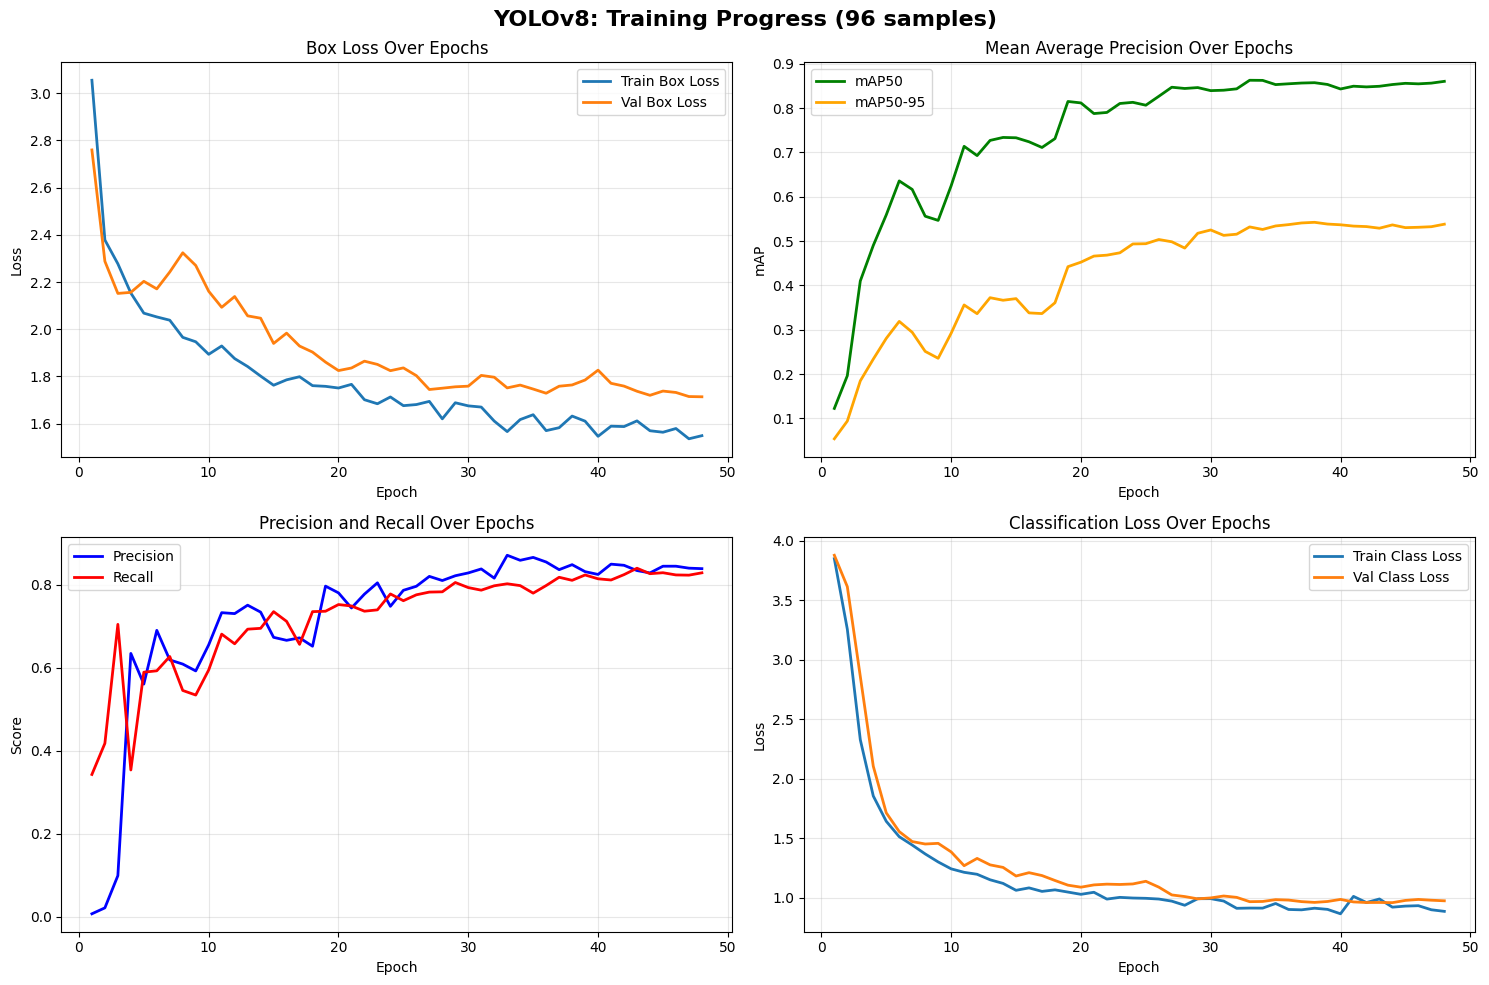

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('YOLOv8: Training Progress (96 samples)', fontsize=16, fontweight='bold')

axes[0, 0].plot(results_df['epoch'], results_df['train/box_loss'], label='Train Box Loss', linewidth=2)
axes[0, 0].plot(results_df['epoch'], results_df['val/box_loss'], label='Val Box Loss', linewidth=2)
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].set_title('Box Loss Over Epochs')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(results_df['epoch'], results_df['metrics/mAP50(B)'], label='mAP50', linewidth=2, color='green')
axes[0, 1].plot(results_df['epoch'], results_df['metrics/mAP50-95(B)'], label='mAP50-95', linewidth=2, color='orange')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('mAP')
axes[0, 1].set_title('Mean Average Precision Over Epochs')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].plot(results_df['epoch'], results_df['metrics/precision(B)'], label='Precision', linewidth=2, color='blue')
axes[1, 0].plot(results_df['epoch'], results_df['metrics/recall(B)'], label='Recall', linewidth=2, color='red')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_title('Precision and Recall Over Epochs')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(results_df['epoch'], results_df['train/cls_loss'], label='Train Class Loss', linewidth=2)
axes[1, 1].plot(results_df['epoch'], results_df['val/cls_loss'], label='Val Class Loss', linewidth=2)
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].set_title('Classification Loss Over Epochs')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{WORK_DIR}/training_progress_graphs.png', dpi=300, bbox_inches='tight')
print("Training progress graphs saved")
plt.show()

Class performance summary saved


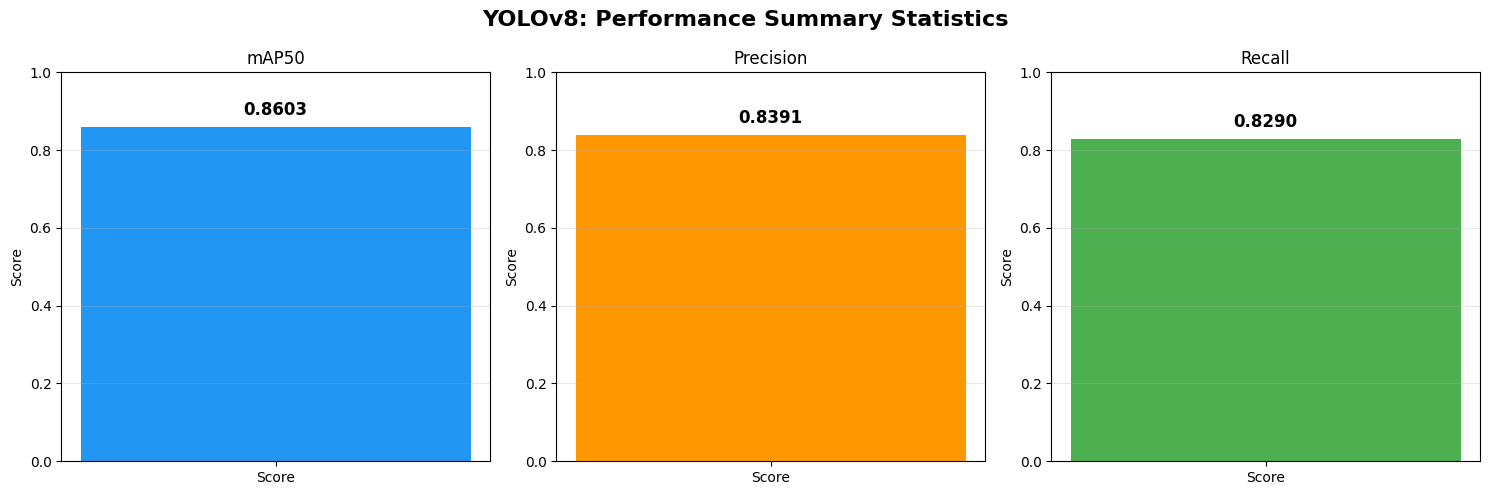

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('YOLOv8: Performance Summary Statistics', fontsize=16, fontweight='bold')

metrics_names = ['mAP50', 'Precision', 'Recall']
metrics_values = [
    results_df['metrics/mAP50(B)'].iloc[-1],
    results_df['metrics/precision(B)'].iloc[-1],
    results_df['metrics/recall(B)'].iloc[-1]
]
colors = ['#2196F3', '#FF9800', '#4CAF50']

for idx, (ax, metric_name, metric_value) in enumerate(zip(axes, metrics_names, metrics_values)):
    ax.bar(['Score'], [metric_value], color=colors[idx], width=0.5)
    ax.set_ylabel('Score')
    ax.set_title(metric_name)
    ax.set_ylim([0, 1])
    ax.text(0, metric_value + 0.03, f'{metric_value:.4f}', ha='center', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(f'{WORK_DIR}/class_performance_summary.png', dpi=300, bbox_inches='tight')
print("Class performance summary saved")
plt.show()

Validation predictions visualization saved


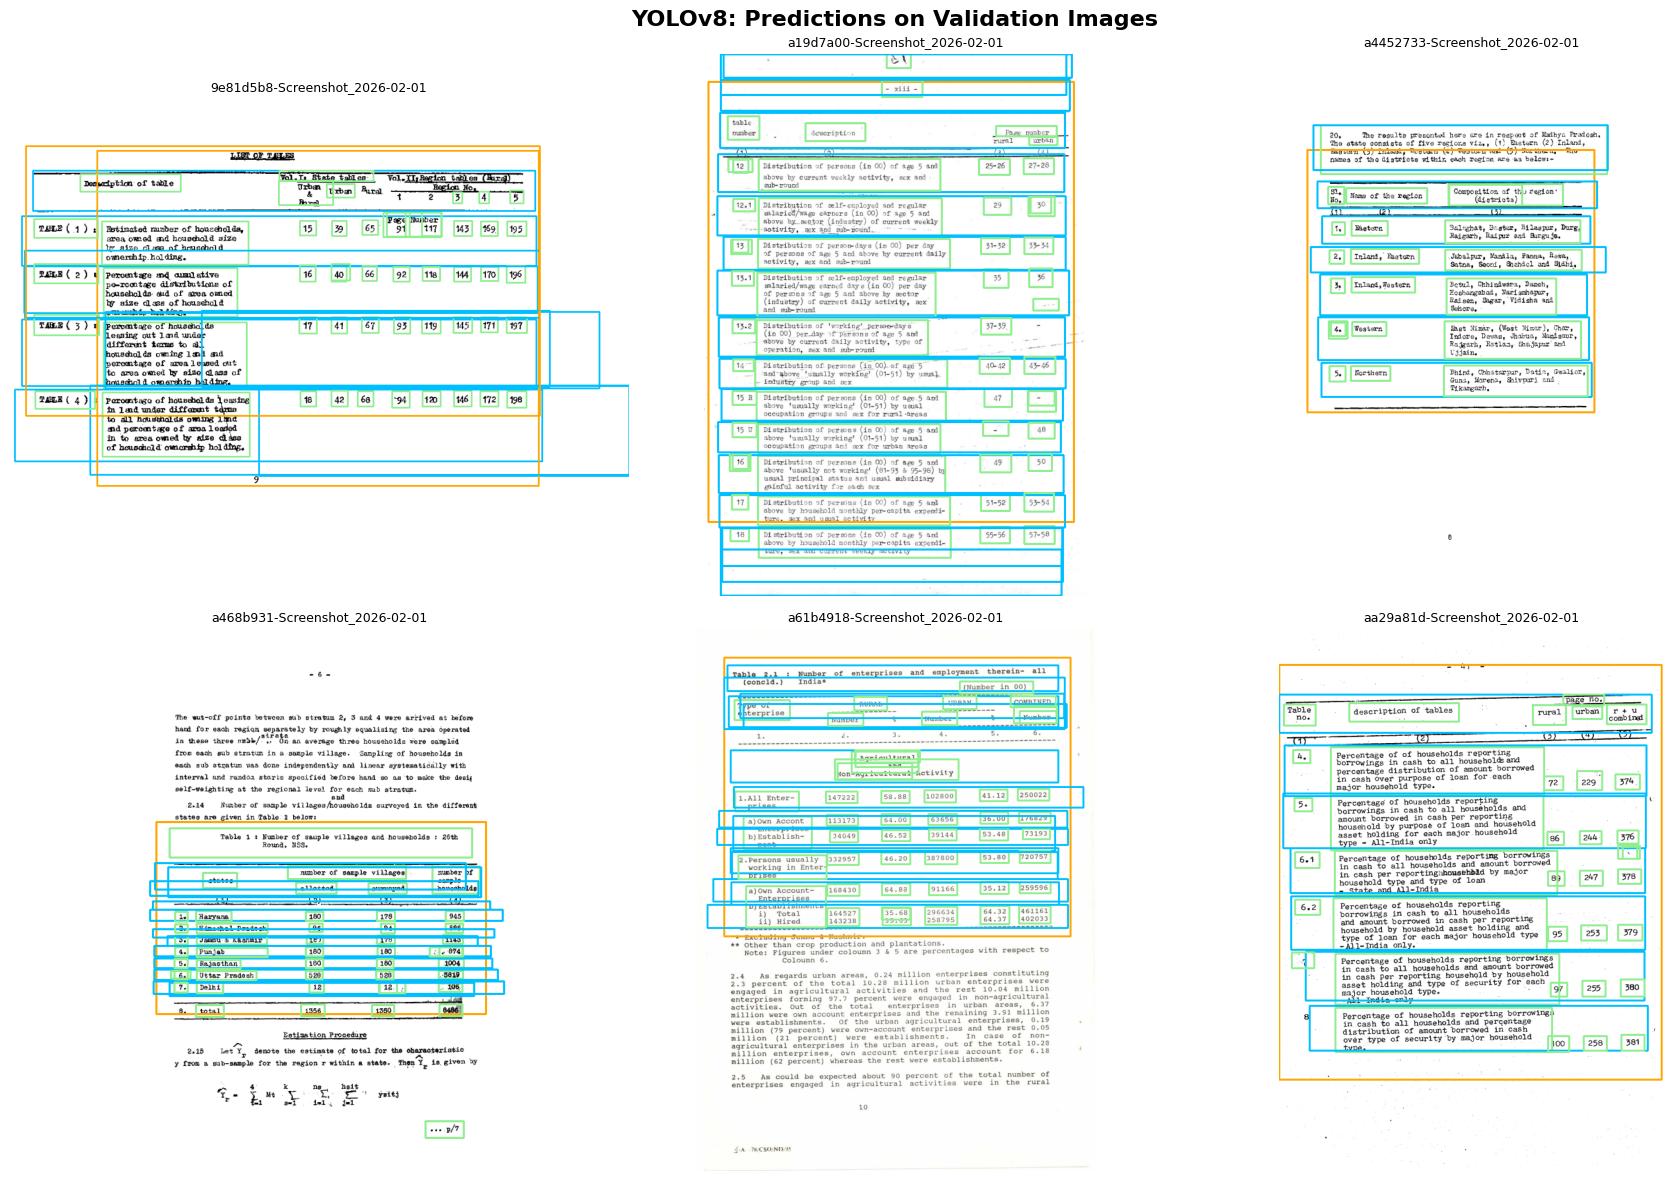

In [ ]:
import cv2
import matplotlib.pyplot as plt

class_colors_bgr = {
    0: (144, 238, 144),
    1: (255, 191, 0),
    2: (0, 165, 255)
}

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('YOLOv8: Predictions on Validation Images', fontsize=16, fontweight='bold')
axes = axes.flatten()

for idx in range(min(6, len(val_images_list))):
    img_file = val_images_list[idx]
    img_path = f'{dataset_dir}/val/images/{img_file}'
    img = cv2.imread(img_path)
    img_draw = img.copy()
    result = results[idx]
    for box in result.boxes:
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
        cls = int(box.cls[0].cpu().numpy())
        color = class_colors_bgr.get(cls, (255, 255, 255))
        cv2.rectangle(img_draw, (x1, y1), (x2, y2), color, 2)
    img_rgb = cv2.cvtColor(img_draw, cv2.COLOR_BGR2RGB)
    axes[idx].imshow(img_rgb)
    axes[idx].set_title(img_file[:30], fontsize=9)
    axes[idx].axis('off')

for idx in range(min(6, len(val_images_list)), 6):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig(f'{WORK_DIR}/validation_predictions_display.png', dpi=300, bbox_inches='tight')
print("Validation predictions visualization saved")
plt.show()

Comprehensive analysis dashboard saved


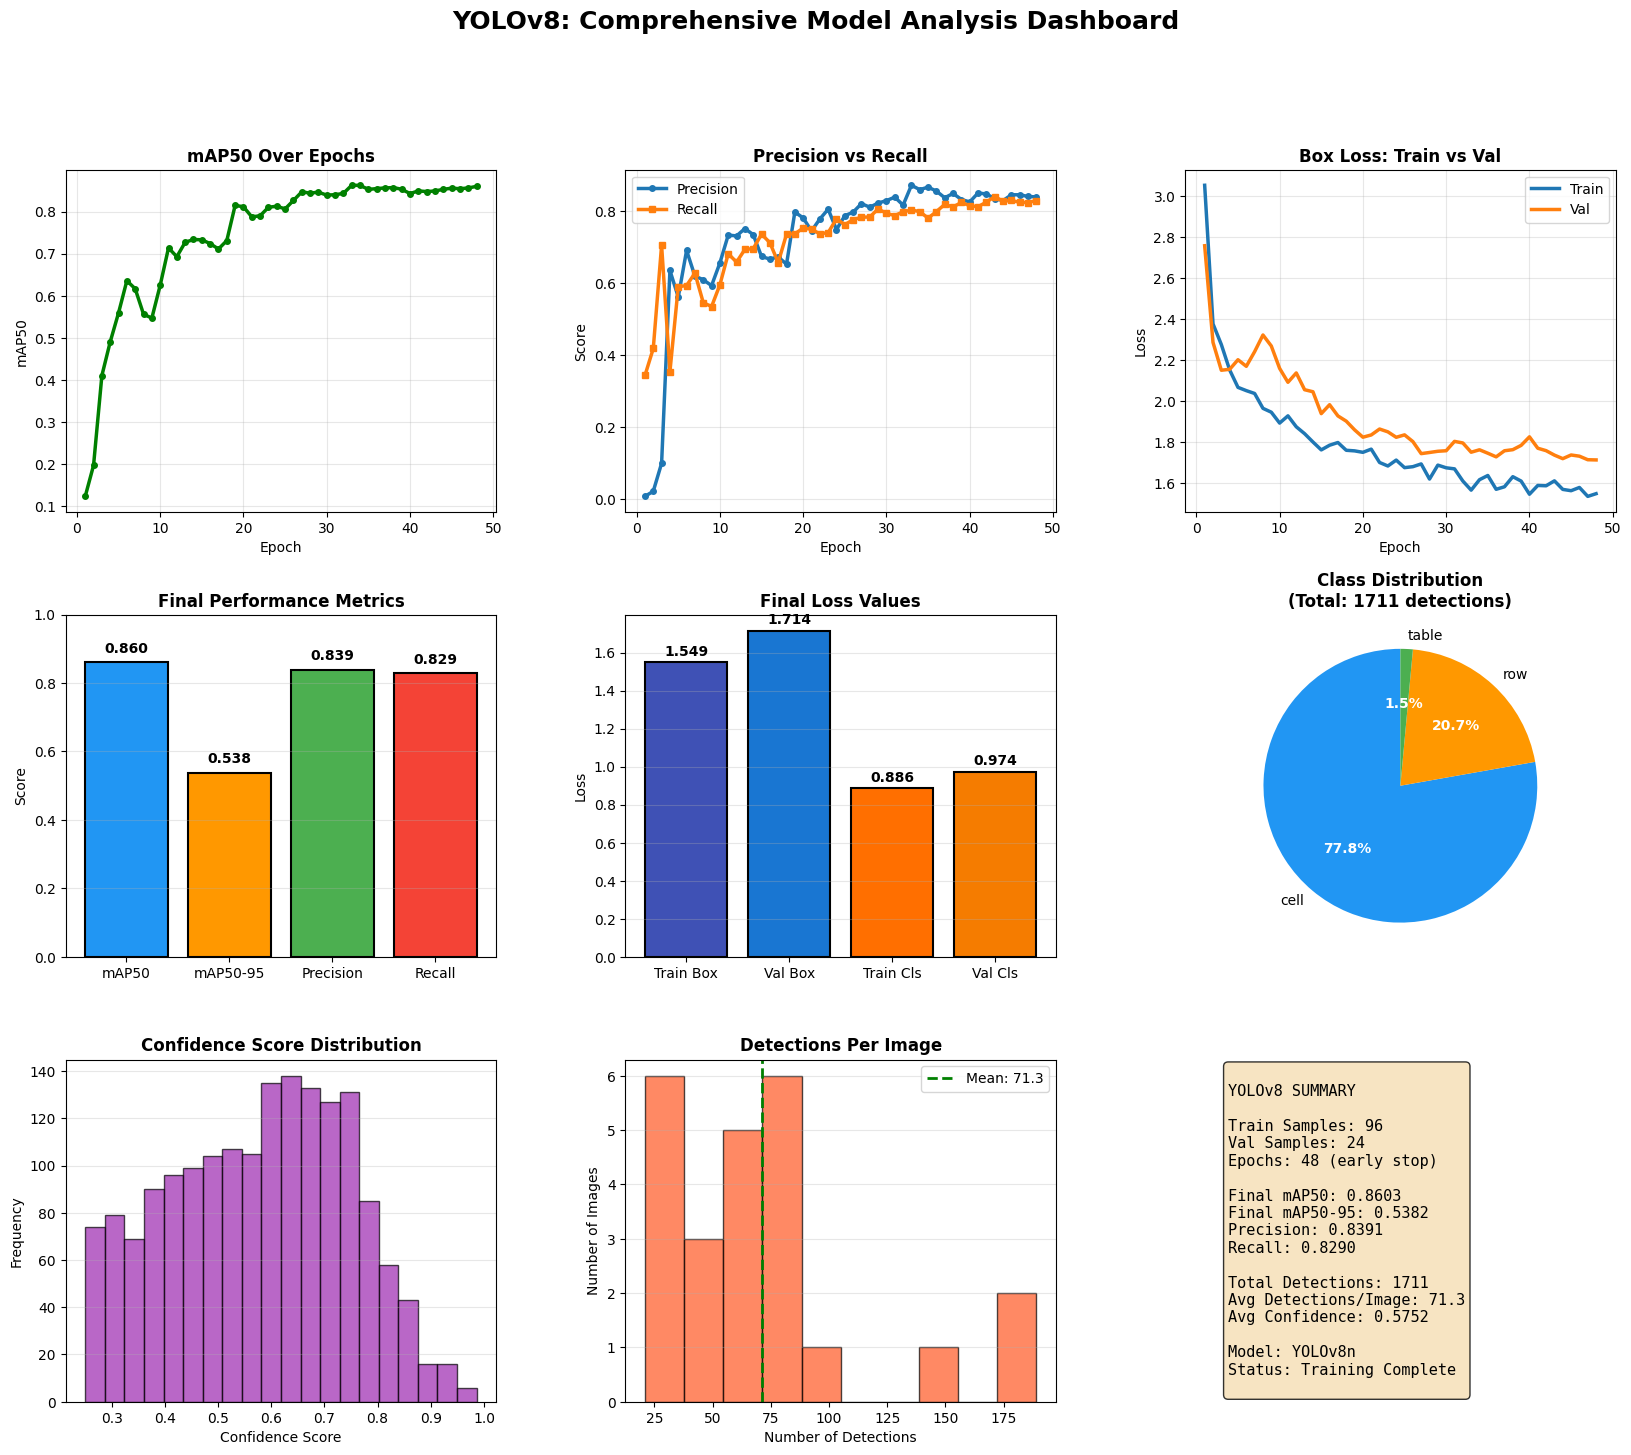


Detailed Statistics:
Total detections     : 1711
Cell detections      : 1331
Row detections       : 355
Table detections     : 25
Average confidence   : 0.5752
Avg detections/image : 71.29


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)
fig.suptitle('YOLOv8: Comprehensive Model Analysis Dashboard', fontsize=18, fontweight='bold')

ax1 = fig.add_subplot(gs[0, 0])
epochs = results_df['epoch'].values
ax1.plot(epochs, results_df['metrics/mAP50(B)'], linewidth=2.5, marker='o', markersize=4, color='green')
ax1.set_title('mAP50 Over Epochs', fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('mAP50')
ax1.grid(True, alpha=0.3)

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(epochs, results_df['metrics/precision(B)'], label='Precision', linewidth=2.5, marker='o', markersize=4)
ax2.plot(epochs, results_df['metrics/recall(B)'], label='Recall', linewidth=2.5, marker='s', markersize=4)
ax2.set_title('Precision vs Recall', fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Score')
ax2.legend()
ax2.grid(True, alpha=0.3)

ax3 = fig.add_subplot(gs[0, 2])
ax3.plot(epochs, results_df['train/box_loss'], label='Train', linewidth=2.5)
ax3.plot(epochs, results_df['val/box_loss'], label='Val', linewidth=2.5)
ax3.set_title('Box Loss: Train vs Val', fontweight='bold')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Loss')
ax3.legend()
ax3.grid(True, alpha=0.3)

ax4 = fig.add_subplot(gs[1, 0])
metrics_names_bar = ['mAP50', 'mAP50-95', 'Precision', 'Recall']
metrics_values_bar = [
    results_df['metrics/mAP50(B)'].iloc[-1],
    results_df['metrics/mAP50-95(B)'].iloc[-1],
    results_df['metrics/precision(B)'].iloc[-1],
    results_df['metrics/recall(B)'].iloc[-1]
]
colors_bar = ['#2196F3', '#FF9800', '#4CAF50', '#F44336']
bars = ax4.bar(metrics_names_bar, metrics_values_bar, color=colors_bar, edgecolor='black', linewidth=1.5)
ax4.set_title('Final Performance Metrics', fontweight='bold')
ax4.set_ylabel('Score')
ax4.set_ylim([0, 1])
for bar, val in zip(bars, metrics_values_bar):
    ax4.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.02, f'{val:.3f}', ha='center', va='bottom', fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

ax5 = fig.add_subplot(gs[1, 1])
loss_final = [
    results_df['train/box_loss'].iloc[-1],
    results_df['val/box_loss'].iloc[-1],
    results_df['train/cls_loss'].iloc[-1],
    results_df['val/cls_loss'].iloc[-1]
]
loss_labels = ['Train Box', 'Val Box', 'Train Cls', 'Val Cls']
colors_loss = ['#3F51B5', '#1976D2', '#FF6F00', '#F57C00']
bars2 = ax5.bar(loss_labels, loss_final, color=colors_loss, edgecolor='black', linewidth=1.5)
ax5.set_title('Final Loss Values', fontweight='bold')
ax5.set_ylabel('Loss')
for bar, val in zip(bars2, loss_final):
    ax5.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.02, f'{val:.3f}', ha='center', va='bottom', fontweight='bold')
ax5.grid(True, alpha=0.3, axis='y')

ax6 = fig.add_subplot(gs[1, 2])
detection_counts = [0, 0, 0]
for result in results:
    for box in result.boxes:
        cls = int(box.cls[0].cpu().numpy())
        detection_counts[cls] += 1
colors_class = ['#2196F3', '#FF9800', '#4CAF50']
wedges, texts, autotexts = ax6.pie(detection_counts, labels=['cell', 'row', 'table'], autopct='%1.1f%%', colors=colors_class, startangle=90)
ax6.set_title(f'Class Distribution\n(Total: {sum(detection_counts)} detections)', fontweight='bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

ax7 = fig.add_subplot(gs[2, 0])
conf_scores = []
for result in results:
    for box in result.boxes:
        conf_scores.append(box.conf[0].cpu().numpy())
ax7.hist(conf_scores, bins=20, color='#9C27B0', edgecolor='black', alpha=0.7)
ax7.set_title('Confidence Score Distribution', fontweight='bold')
ax7.set_xlabel('Confidence Score')
ax7.set_ylabel('Frequency')
ax7.grid(True, alpha=0.3, axis='y')

ax8 = fig.add_subplot(gs[2, 1])
detections_per_image = [len(result.boxes) for result in results]
ax8.hist(detections_per_image, bins=10, color='#FF5722', edgecolor='black', alpha=0.7)
ax8.set_title('Detections Per Image', fontweight='bold')
ax8.set_xlabel('Number of Detections')
ax8.set_ylabel('Number of Images')
ax8.axvline(np.mean(detections_per_image), color='green', linestyle='--', linewidth=2, label=f'Mean: {np.mean(detections_per_image):.1f}')
ax8.legend()
ax8.grid(True, alpha=0.3, axis='y')

ax9 = fig.add_subplot(gs[2, 2])
summary_text = f"""
YOLOv8 SUMMARY

Train Samples: 96
Val Samples: 24
Epochs: 48 (early stop)

Final mAP50: {results_df['metrics/mAP50(B)'].iloc[-1]:.4f}
Final mAP50-95: {results_df['metrics/mAP50-95(B)'].iloc[-1]:.4f}
Precision: {results_df['metrics/precision(B)'].iloc[-1]:.4f}
Recall: {results_df['metrics/recall(B)'].iloc[-1]:.4f}

Total Detections: {sum(detection_counts)}
Avg Detections/Image: {np.mean(detections_per_image):.1f}
Avg Confidence: {np.mean(conf_scores):.4f}

Model: YOLOv8n
Status: Training Complete
"""
ax9.text(0.1, 0.5, summary_text, fontsize=11, verticalalignment='center', family='monospace', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
ax9.axis('off')

plt.savefig(f'{WORK_DIR}/comprehensive_analysis_dashboard.png', dpi=300, bbox_inches='tight')
print("Comprehensive analysis dashboard saved")
plt.show()

print(f"\nDetailed Statistics:")
print(f"Total detections     : {sum(detection_counts)}")
print(f"Cell detections      : {detection_counts[0]}")
print(f"Row detections       : {detection_counts[1]}")
print(f"Table detections     : {detection_counts[2]}")
print(f"Average confidence   : {np.mean(conf_scores):.4f}")
print(f"Avg detections/image : {np.mean(detections_per_image):.2f}")